In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_67239_R')

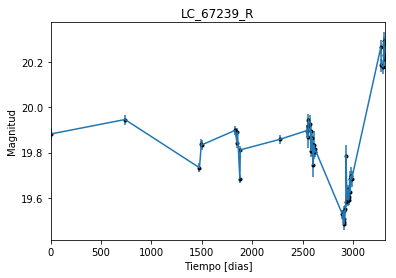

In [2]:
data = np.genfromtxt('LC_67239_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_67239_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

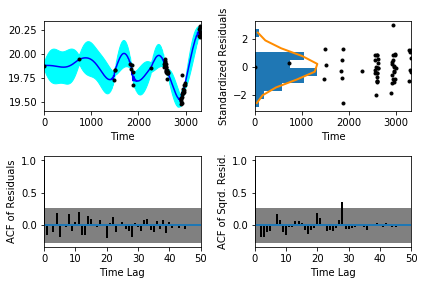

In [5]:
sample.assess_fit()

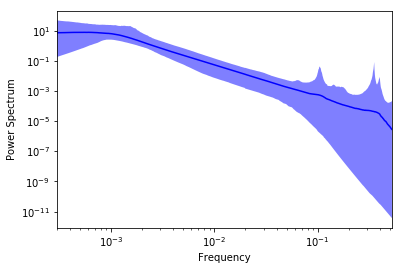

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_67239_R')

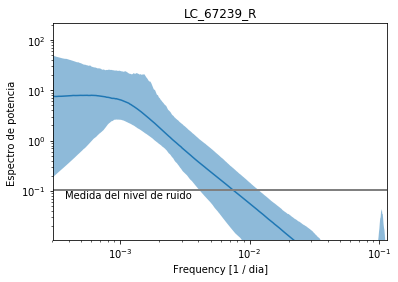

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_67239_R')

Text(0.5,1,'Prediccion , valor esperado LC_67239_R')

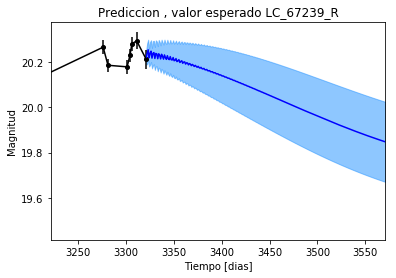

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_67239_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_67239_R')

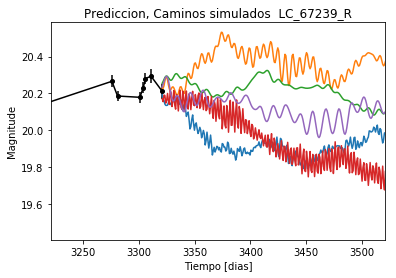

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_67239_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_67239_R')

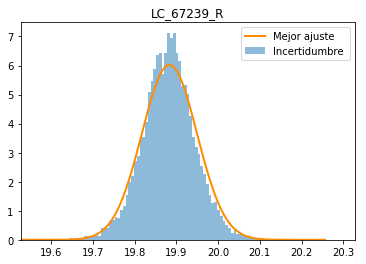

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_67239_R')

Text(0.5,1,'Interpolacion, camino simulado LC_67239_R')

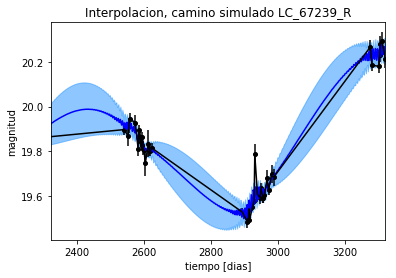

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_67239_R')

Text(0.5,1,'Interpolacion, camino simulado LC_67239_R')

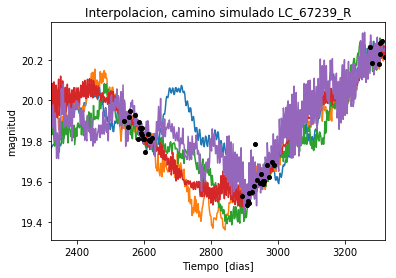

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_67239_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 423.229544328
Median: 0.00744498728086
Standard deviation: 0.0959132738601
68% credibility interval: [ 0.00081011  0.04414593]
95% credibility interval: [ 0.00033614  0.25751299]
99% credibility interval: [  3.08929821e-04   7.83340745e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 559.451167804
Median: 0.00683335635684
Standard deviation: 0.0599478622447
68% credibility interval: [ 0.0007468   0.03816259]
95% credibility interval: [ 0.00033429  0.17242919]
99% credibility interval: [  3.08929821e-04   3.80778979e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 191.560283157
Median: 0.000733901549167
Standard deviat

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 199.550086583
Median: 91.7777106672
Standard deviation: 3.06918158096
68% credibility interval: [ 88.91113112  95.03341212]
95% credibility interval: [ 85.49969212  97.46611968]
99% credibility interval: [ 83.28138032  98.49611966]


In [18]:
sample.posterior_summaries('ar_coefs')


Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 358.531086137
Median: 0.227192069585
Standard deviation: 1.73756751253
68% credibility interval: [ 0.0587462   2.09636986]
95% credibility interval: [ 0.01446633  6.03572044]
99% credibility interval: [  8.67862152e-03   9.72202459e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 107.717390218
Median: 4.75867143558
Standard deviation: 9.37114437764
68% credibility interval: [  0.44642565  16.62871653]
95% credibility interval: [  0.

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 707.962229645
Median: 37.0467619333
Standard deviation: 2.70116498756e+134
68% credibility interval: [  4.51453178e-39   1.27345063e+08]
95% credibility interval: [  3.98870236e-076   1.88567593e+108]
99% credibility interval: [  9.66383759e-092   8.22087210e+133]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 606.568963692
Median: 19.8566699191
Standard deviation: 0.0736523146772
68% credibility interval: [ 19.80141528  19.92496206]
95% credibility interval: [ 19.73331508  20.03839552]
99% credibility interval: [ 19.66247521  20.13167668]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 169.343999437
Median: 0.341485308186
Standard deviation: 0.243480020477
68% credibility interval: [ 0.10290501  0.64370496]
95% credibility interval: [ 0.          0.90078906]
99% credibility interval: [ 0.          1.00041908]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 169.343999437
Median: 0.341485308186
Standard deviation: 0.243480020477
68% credibility interval: [ 0.10290501  0.64370496]
95% credibility interval: [ 0.          0.90078906]
99% credibility interval: [ 0.          1.00041908]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 100.772073175
Median: 0.000299541740442
Standard deviation: 0.0005713974

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 199.550086583
Median: 91.7777106672
Standard deviation: 3.06918158096
68% credibility interval: [ 88.91113112  95.03341212]
95% credibility interval: [ 85.49969212  97.46611968]
99% credibility interval: [ 83.28138032  98.49611966]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 467.613151214
Median: 0.0324411446227
Standard deviation: 0.0270740206885
68% credibility interval: [ 0.02054712  0.05870779]
95% credibility interval: [ 0.01453731  0.10423144]
99% credibility interval: [ 0.01190083  0.17480521]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2068.08186613
Median: 1.11762153708
Standard deviation: 0.23627575168
68% credibility interval: [ 0.92532513  1.38683728]
95% credibility interval: [ 0.78289273  1.71811534]
99% credibility interval: [ 0.69881012  1.87548632]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 241.376139505
Median: 0.000710815874886
Standard deviation: 0.334629371288
68% credibility interval: [  4.00493124e-10   1.00794739e-01]
95% credibility interval: [  1.85507206e-112   9.72663801e-001]
99% credibility interval: [  3.19506126e-135   2.18461671e+000]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 423.229544328
Median: (-0.0467782346952-4.1667800187j)
Standard deviation: 1.64424940863
68% credibility interval: [-0.27737707-0.69364448j -0.00509008-5.61270878j]
95% credibility interval: [-1.61800184-5.0671204j  -0.00211206-0.63834524j]
99% credibility interval: [ -4.92187506e+00 -6.43142051e+00j  -1.94106331e-03 -6.09055033e-03j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 559.451167804
Median: (-0.04293524426+0.180389141013j)
Standard deviation: 1.57551753676
68% credibility interval: [-0.23978262+1.13156898j -0.00469226+5.63968115j]
95% credibility interval: [-1.08340458+2.9359494j  -0.00210040+0.39058807j]
99% credibility interval: [ -2.39250489e+00+2.03828681j  -1.94106331e-03+0.00609055j]
Posterior summar